In [1]:
import pandas as pd
from lxml import etree
import seaborn as sns
import plotly.express as px

In [12]:
def create_df(file, run_type, ev_per):
    root = etree.parse(f"Maps/Lyngby3/outputs/{run_type}/{file}.xml").getroot()
    elems = []

    for time in root:
        for veh in time:
            d_tmp = {}
            for k, v in veh.items():
                if k not in ["id", "NOx", "electricity", "type", "x", "y"]:
                    continue
                if k not in ['id', 'type']:
                    d_tmp[k] = float(v)
                else:
                    d_tmp[k] = v
            d_tmp["time"] = float(time.attrib['time'])
            elems.append(d_tmp)
            
    df = pd.DataFrame(elems)
    df = df.astype({'time':'int'})
    
    df.to_parquet(f"Maps/Lyngby3/processed/{run_type}/{file}.parquet")
    #df = df.groupby("time").sum().reset_index()
    #df['evs'] = ev_per
    
    return df

In [13]:
baseline = create_df("baseline", "cars_dis", 'baseline')
ev_10 = create_df("dis_10", "cars_dis", '10')
ev_15 = create_df("dis_15", "cars_dis", '15')
ev_20 = create_df("dis_20", "cars_dis", '20')
ev_54 = create_df("dis_25", "cars_dis", '54')

In [14]:
baseline = create_df("baseline", "trucks", 'baseline')
ev_10 = create_df("ev_10", "trucks", '10')
ev_15 = create_df("ev_15", "trucks", '15')
ev_20 = create_df("ev_20", "trucks", '20')
ev_54 = create_df("ev_5", "trucks", '54')

In [15]:
baseline = create_df("baseline", "cars", 'baseline')
ev_10 = create_df("ev_10", "cars", '10')
ev_15 = create_df("ev_15", "cars", '15')
ev_20 = create_df("ev_20", "cars", '20')
ev_54 = create_df("ev_54", "cars", '54')

In [16]:
ev_54_truck_20 = create_df("ev_54_truck_20", "etc", '10')

In [6]:
df_out = pd.concat([baseline, ev_10, ev_15, ev_20, ev_54], axis=0)

In [9]:
#df_out.to_parquet("Maps/Lyngby3/processed/ev_truck.parquet")

In [2]:
pd.read_parquet("Maps/Lyngby3/processed/ev_truck.parquet")

,time,NOx,electricity,x,y,evs
0,0,0.12,0.00,4882.41,3091.64,baseline
1,1,0.19,0.00,4896.30,3092.67,baseline
2,2,0.28,0.00,6304.10,3892.58,baseline
3,3,0.33,0.00,6316.66,3896.32,baseline
4,4,0.46,0.00,8122.65,7065.53,baseline
...,...,...,...,...,...,...
7195,7195,11.19,-6.81,373995.46,253847.78,54
7196,7196,10.35,24.82,373738.75,253796.05,54
7197,7197,11.15,-1.63,375649.52,256131.52,54
7198,7198,10.64,12.18,376846.64,256850.17,54


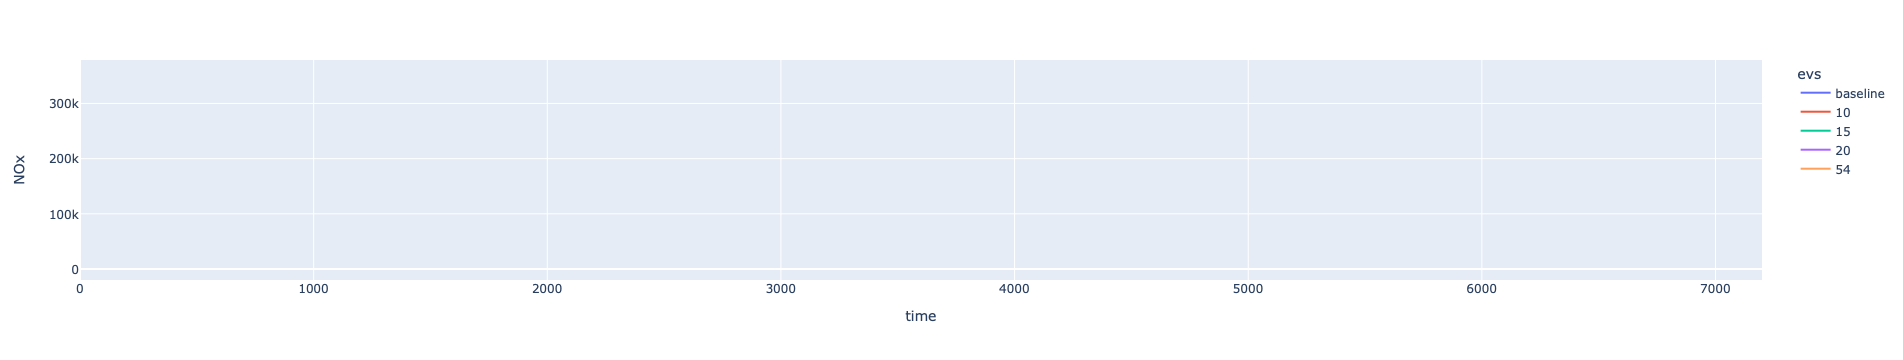

In [12]:
fig = px.line(df_out, x="time", y="NOx", color='evs')
fig.show()

In [ ]:
fig = px.line(df_out, x="time", y="NOx", color='evs')
fig.show()

In [5]:
df

,id,NOx,electricity,type,x,y,time
0,truck0,45.48,0.00,truck_petrol,1055.86,1840.51,0
1,veh0,0.00,0.00,veh_diesel,750.07,1743.72,0
2,truck0,45.16,0.00,truck_petrol,1042.67,1845.08,1
3,veh0,0.00,0.00,veh_diesel,763.21,1748.11,1
4,truck0,44.59,0.00,truck_petrol,1029.53,1849.68,2
...,...,...,...,...,...,...,...
329553,veh987,0.03,0.00,veh_diesel,2032.78,1701.73,3599
329554,veh989,0.04,0.00,veh_petrol,2044.29,1728.95,3599
329555,veh990,0.00,0.05,veh_ev,1513.71,643.95,3599
329556,veh993,0.01,0.00,veh_petrol,1747.96,1716.98,3599


In [5]:
times = []

time_str = "2022/01/01 00:00"

for d in df['time']:
    times.append(pd.to_datetime(time_str) + pd.Timedelta(seconds=int(d)))
    
df['timedelta'] = df['time']
df['time'] = times

df_test =df[df['id'] == 'truck0']

In [6]:
df['type'].unique()

array(['truck_petrol', 'veh_petrol', 'truck_hybrid', 'veh_diesel',
       'veh_hybrid', 'veh_ev'], dtype=object)

In [7]:
x_coords = {}
y_coords = {}

x1 = 12.532868
y1 = 55.671349
x2 = 12.594002
y2 = 55.727314

t1 = (x2 - x1)/9
t2 = (y2 - y1)/9

for i in range(10):
    i1 = x1 + i*t1
    i2 = x1 + (i+1)*t1
    i_mean = (i1+i2)/2
    x_coords[str(i+1)] = {"x1": i1, "x2": i2, "x_mean": i_mean}
    
for i in range(10):
    j1 = y1 + i*t2
    j2 = y1 + (i+1)*t2
    y_mean = (j1+j2)/2
    y_coords[str(i+1)] = {"y1": j1, "y2": j2, "y_mean": y_mean}
    
coords_d = {}
for g1, v1 in x_coords.items():
    for g2, v2 in y_coords.items():
        coords_d[f"{g1}_{g2}"] = {"x": v1["x_mean"], "y": v2["y_mean"]}

In [39]:
df

,id,NOx,electricity,type,x,y,time,timedelta
0,truck0,38.95,0.0,truck_petrol,1008.35,2011.40,2022-01-01 00:00:00,0
1,veh0,0.00,0.0,veh_petrol,1181.15,389.73,2022-01-01 00:00:00,0
2,truck0,41.67,0.0,truck_petrol,1009.30,2011.69,2022-01-01 00:00:01,1
3,veh0,0.00,0.0,veh_petrol,1169.73,398.01,2022-01-01 00:00:01,1
4,truck0,42.54,0.0,truck_petrol,1010.94,2012.18,2022-01-01 00:00:02,2
...,...,...,...,...,...,...,...,...
567773,veh1594,0.01,0.0,veh_diesel,2029.84,656.81,2022-01-01 01:06:57,4017
567774,veh1594,0.01,0.0,veh_diesel,2035.29,660.46,2022-01-01 01:06:58,4018
567775,veh1594,0.02,0.0,veh_diesel,2042.18,665.07,2022-01-01 01:06:59,4019
567776,veh1594,0.00,0.0,veh_diesel,2049.29,661.94,2022-01-01 01:07:00,4020


In [8]:
df.to_parquet("osterbro_lat.parquet")

In [9]:
df.to_csv("osterbro_lat.csv")

In [45]:
grid_x = []
grid_y = []
gridz = []

for idx,row in df.iterrows():
    for g1, v1 in x_coords.items():
        if v1['x1'] <= row['x'] <= v1['x2']:
            xx = g1
    for g2, v2 in y_coords.items():
        if v2['y1'] <= row['y'] <= v2['y2']:
            yy = g2
            
    
    gridz.append(f"{xx}_{yy}")
    
df['grid'] = gridz

In [49]:
df_grid = pd.DataFrame()

#g_data = df.groupby('grid').get_group('6_6')
#g_name = "6_6"

for g_name, g_data in df.groupby('grid'):
    for t_name, t_data in g_data.groupby('time'):
        df_grid = pd.concat([df_grid, pd.DataFrame({'grid': g_name, 'time': t_name, 'NOx': g_data['NOx'].sum()}, index=[0])], axis=0, ignore_index=True)

In [59]:
df_grid

,grid,time,NOx
0,4_4,2022-01-01 00:07:55,1252.51
1,4_4,2022-01-01 00:07:56,1252.51
2,4_4,2022-01-01 00:07:57,1252.51
3,4_4,2022-01-01 00:07:58,1252.51
4,4_4,2022-01-01 00:07:59,1252.51
...,...,...,...
78619,9_7,2022-01-01 01:05:30,76426.89
78620,9_7,2022-01-01 01:05:31,76426.89
78621,9_7,2022-01-01 01:05:32,76426.89
78622,9_7,2022-01-01 01:05:33,76426.89


In [52]:
df.groupby('timedelta').get_group(0)

,id,NOx,electricity,type,x,y,time,timedelta,grid
0,truck0,38.95,0.00,truck_petrol,12.572871,55.708206,2022-01-01,0,6_6
1,veh0,0.00,1.03,veh_hybrid,12.576520,55.693703,2022-01-01,0,7_4


In [57]:

grid_tmp = df_grid[df_grid['grid'] == "6_6"]

In [58]:
grid_tmp['NOx'].unique()

array([381988.66])

In [10]:
df.head()

,id,NOx,electricity,type,x,y,time,timedelta,grid
0,truck0,38.95,0.00,truck_petrol,12.572871,55.708206,2022-01-01 00:00:00,0,6_6
1,veh0,0.00,1.03,veh_hybrid,12.576520,55.693703,2022-01-01 00:00:00,0,7_4
2,truck0,41.67,0.00,truck_petrol,12.572886,55.708209,2022-01-01 00:00:01,1,6_6
3,veh0,0.00,0.00,veh_hybrid,12.576334,55.693773,2022-01-01 00:00:01,1,7_4
4,truck0,42.54,0.00,truck_petrol,12.572912,55.708214,2022-01-01 00:00:02,2,6_6


In [27]:
df_grid.to_csv('grid.csv')

In [31]:
df_grid

,x,y,time,NOx
0,12.556642,55.693113,2022-01-01 00:07:55,1252.51
1,12.556642,55.693113,2022-01-01 00:07:56,1252.51
2,12.556642,55.693113,2022-01-01 00:07:57,1252.51
3,12.556642,55.693113,2022-01-01 00:07:58,1252.51
4,12.556642,55.693113,2022-01-01 00:07:59,1252.51
...,...,...,...,...
78619,12.590606,55.711768,2022-01-01 01:05:30,76426.89
78620,12.590606,55.711768,2022-01-01 01:05:31,76426.89
78621,12.590606,55.711768,2022-01-01 01:05:32,76426.89
78622,12.590606,55.711768,2022-01-01 01:05:33,76426.89


In [29]:
df['x_grid'] = df_grid['x']
df['y_grid'] = df_grid['y']
df['nox_grid'] = df_grid['NOx']

In [30]:
df

,id,NOx,electricity,type,x,y,time,timedelta,grid,x_grid,y_grid,nox_grid
0,truck0,38.95,0.00,truck_petrol,12.572871,55.708206,2022-01-01 00:00:00,0,6_6,12.556642,55.693113,1252.51
1,veh0,0.00,1.03,veh_hybrid,12.576520,55.693703,2022-01-01 00:00:00,0,7_4,12.556642,55.693113,1252.51
2,truck0,41.67,0.00,truck_petrol,12.572886,55.708209,2022-01-01 00:00:01,1,6_6,12.556642,55.693113,1252.51
3,veh0,0.00,0.00,veh_hybrid,12.576334,55.693773,2022-01-01 00:00:01,1,7_4,12.556642,55.693113,1252.51
4,truck0,42.54,0.00,truck_petrol,12.572912,55.708214,2022-01-01 00:00:02,2,6_6,12.556642,55.693113,1252.51
...,...,...,...,...,...,...,...,...,...,...,...,...
567773,veh1594,0.00,1.94,veh_hybrid,12.589862,55.696366,2022-01-01 01:06:57,4017,9_5,NaN,NaN,NaN
567774,veh1594,0.00,2.32,veh_hybrid,12.589947,55.696400,2022-01-01 01:06:58,4018,9_5,NaN,NaN,NaN
567775,veh1594,0.00,2.34,veh_hybrid,12.590054,55.696444,2022-01-01 01:06:59,4019,9_5,NaN,NaN,NaN
567776,veh1594,0.00,1.29,veh_hybrid,12.590168,55.696418,2022-01-01 01:07:00,4020,9_5,NaN,NaN,NaN


In [126]:
df['grid_x'] = grid_x
df['grid_y'] = grid_y

In [129]:
df.groupby('timedelta').get_group(0)

,id,NOx,electricity,type,x,y,time,timedelta,grid_x,grid_y
45,truck0,65.78,0.00,truck_petrol,12.573651,55.708359,2022-01-01 00:00:10,10,12.577020,55.705550
46,truck1,60.91,0.00,truck_petrol,12.561012,55.709750,2022-01-01 00:00:10,10,12.563435,55.711768
47,truck2,39.42,0.00,truck_petrol,12.580011,55.712842,2022-01-01 00:00:10,10,12.577020,55.711768
48,truck3,38.95,0.00,truck_petrol,12.576280,55.702175,2022-01-01 00:00:10,10,12.577020,55.699331
49,veh0,0.00,2.06,veh_hybrid,12.576408,55.694346,2022-01-01 00:00:10,10,12.577020,55.693113
50,veh1,0.00,1.01,veh_hybrid,12.576901,55.702426,2022-01-01 00:00:10,10,12.577020,55.699331
51,veh2,0.00,0.00,veh_diesel,12.574343,55.700656,2022-01-01 00:00:10,10,12.577020,55.699331
52,veh3,0.01,0.00,veh_diesel,12.572236,55.708232,2022-01-01 00:00:10,10,12.570228,55.705550
53,veh4,0.00,1.60,veh_ev,12.586769,55.693688,2022-01-01 00:00:10,10,12.583813,55.693113


In [112]:
df_test.to_csv("testo.csv")

In [115]:
df.to_csv("test1.csv")

In [116]:
df.head()
    
#df['time'] = times

,id,NOx,electricity,type,x,y,time,grid_x,grid_y
0,truck0,38.95,0.00,truck_petrol,12.572871,55.708206,2022-01-01 00:00:00,12.570228,55.705550
1,veh0,0.00,1.03,veh_hybrid,12.576520,55.693703,2022-01-01 00:00:00,12.577020,55.693113
2,truck0,41.67,0.00,truck_petrol,12.572886,55.708209,2022-01-01 00:00:01,12.570228,55.705550
3,veh0,0.00,0.00,veh_hybrid,12.576334,55.693773,2022-01-01 00:00:01,12.577020,55.693113
4,truck0,42.54,0.00,truck_petrol,12.572912,55.708214,2022-01-01 00:00:02,12.570228,55.705550


In [120]:
df.groupby('time').get_groups()

AttributeError: 'DataFrameGroupBy' object has no attribute 'get_groups'

In [9]:
df.to_parquet("emissions.parquet")

In [97]:
df_out = pd.DataFrame()

for v_type, v_data in df.groupby('type'):
    df_ems = v_data.groupby('time').sum()
    df_out[v_type] = df_ems['NOx'].cumsum()

In [2]:
def create_df():
    root = etree.parse(f"Lyngby_long/outputs/cars/baseline.xml").getroot()
    elems = []

    for time in root:
        for veh in time:
            d_tmp = {}
            for k, v in veh.items():
                if k not in ["id", "NOx", "electricity", "type", "x", "y"]:
                    continue
                if k not in ['id', 'type']:
                    d_tmp[k] = float(v)
                else:
                    d_tmp[k] = v
            d_tmp["time"] = float(time.attrib['time'])
            elems.append(d_tmp)
            
    df = pd.DataFrame(elems)
    df = df.astype({'time':'int'})
    
    df.to_parquet(f"Lyngby_long/processed/cars/baseline.parquet")
    #df = df.groupby("time").sum().reset_index()
    #df['evs'] = ev_per
    
    return df

In [3]:
baseline = create_df()